In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('assets/homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


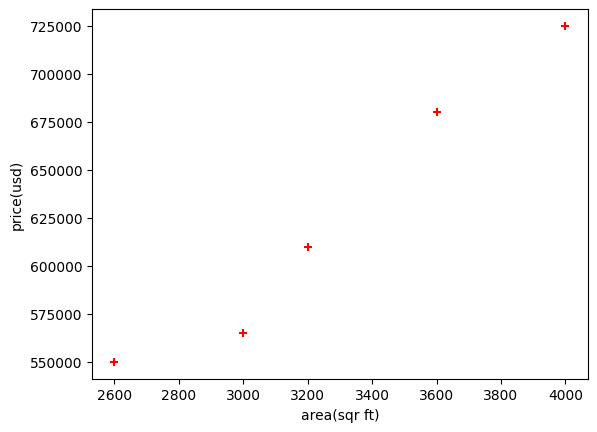

In [3]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(usd)')
plt.scatter(df.area,df.price, color='red', marker='+')

In [4]:
# instancio el objeto LinearRegression de sklearn
# 'reg' es nuestro modelo concreto
reg = linear_model.LinearRegression()

# entreno el modelo con una sola columna de valores
# el segundo parametro es la columna a predecir
reg.fit(df[['area']], df.price)

LinearRegression()

In [5]:
# ejecuta ---> y = m * x + b
reg.predict([[3300]])

c:\Users\titi2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [6]:
# llamamos 'coefficient' a la pendiente de la recta (m)
reg.coef_

array([135.78767123])

In [7]:
# llamamos 'intercept' a la ordenada al origen de la recta (b)
reg.intercept_

180616.43835616432

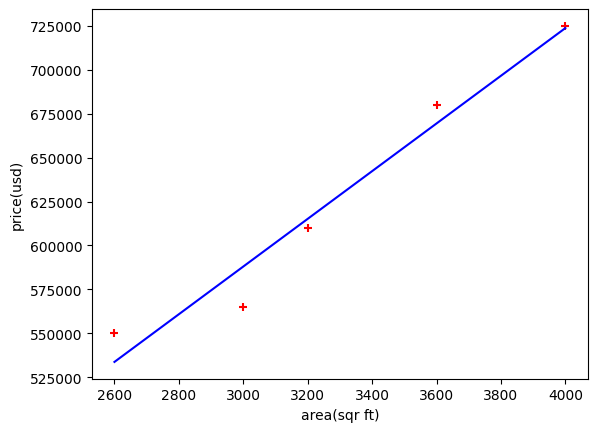

In [8]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(usd)')
plt.scatter(df.area,df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [9]:
df2 = pd.read_csv('assets/areas.csv')
df2.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [10]:
df2['prices'] = reg.predict(df2)
df2.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [11]:
df2.to_csv('assets/prediction.csv', index=False)